In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

In [3]:
#df = pd.read_excel("C:\\Users\\admin\\OneDrive - Auckland Institute of Studies\\Documents\\AIS\\AI\\DataSet\\default_credit_card_clients\\default_credit_card_clients.xls")

df = pd.read_excel("default_credit_card_clients.xls")

In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [6]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [7]:
df.isna().any()

ID           False
LIMIT_BAL    False
SEX          False
EDUCATION    False
MARRIAGE     False
AGE          False
PAY_0        False
PAY_2        False
PAY_3        False
PAY_4        False
PAY_5        False
PAY_6        False
BILL_AMT1    False
BILL_AMT2    False
BILL_AMT3    False
BILL_AMT4    False
BILL_AMT5    False
BILL_AMT6    False
PAY_AMT1     False
PAY_AMT2     False
PAY_AMT3     False
PAY_AMT4     False
PAY_AMT5     False
PAY_AMT6     False
default      False
dtype: bool

In [8]:
df[df.duplicated()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default


In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


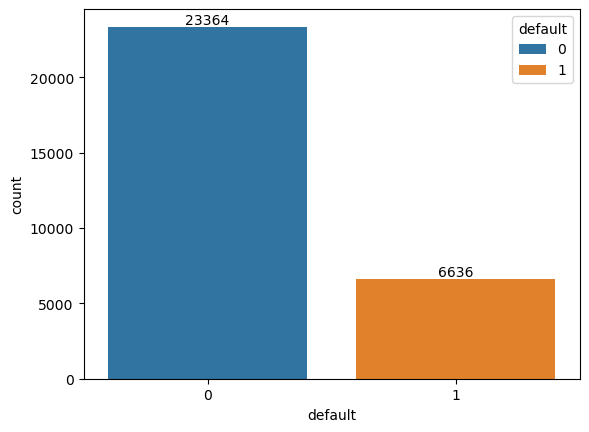

In [11]:
ax = sns.countplot(x='default', data=df, hue='default')
for container in ax.containers:
    ax.bar_label(container)
#plt.figure(figsize=(10,5))
plt.show()

In [12]:
df['default'].value_counts()

default
0    23364
1     6636
Name: count, dtype: int64

In [13]:
# Independent Variable

df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [14]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [15]:
fil = (df['EDUCATION']==5) | (df['EDUCATION']==6) | (df['EDUCATION']==0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [16]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [17]:
fil = df['MARRIAGE']==0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

In [18]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [19]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['default']

C:\Users\admin\AppData\Local\Temp\ipykernel_18932\2954264222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Defaulter'] = df['default']


In [20]:
df_cat.replace({'SEX': {1: 'MALE', 2 : 'FEMALE'}, 'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}, 'MARRIAGE' : {1: 'Married', 2: 'Single', 3: 'Others'}}, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_18932\1529435600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat.replace({'SEX': {1: 'MALE', 2 : 'FEMALE'}, 'EDUCATION': {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}, 'MARRIAGE' : {1: 'Married', 2: 'Single', 3: 'Others'}}, inplace=True)


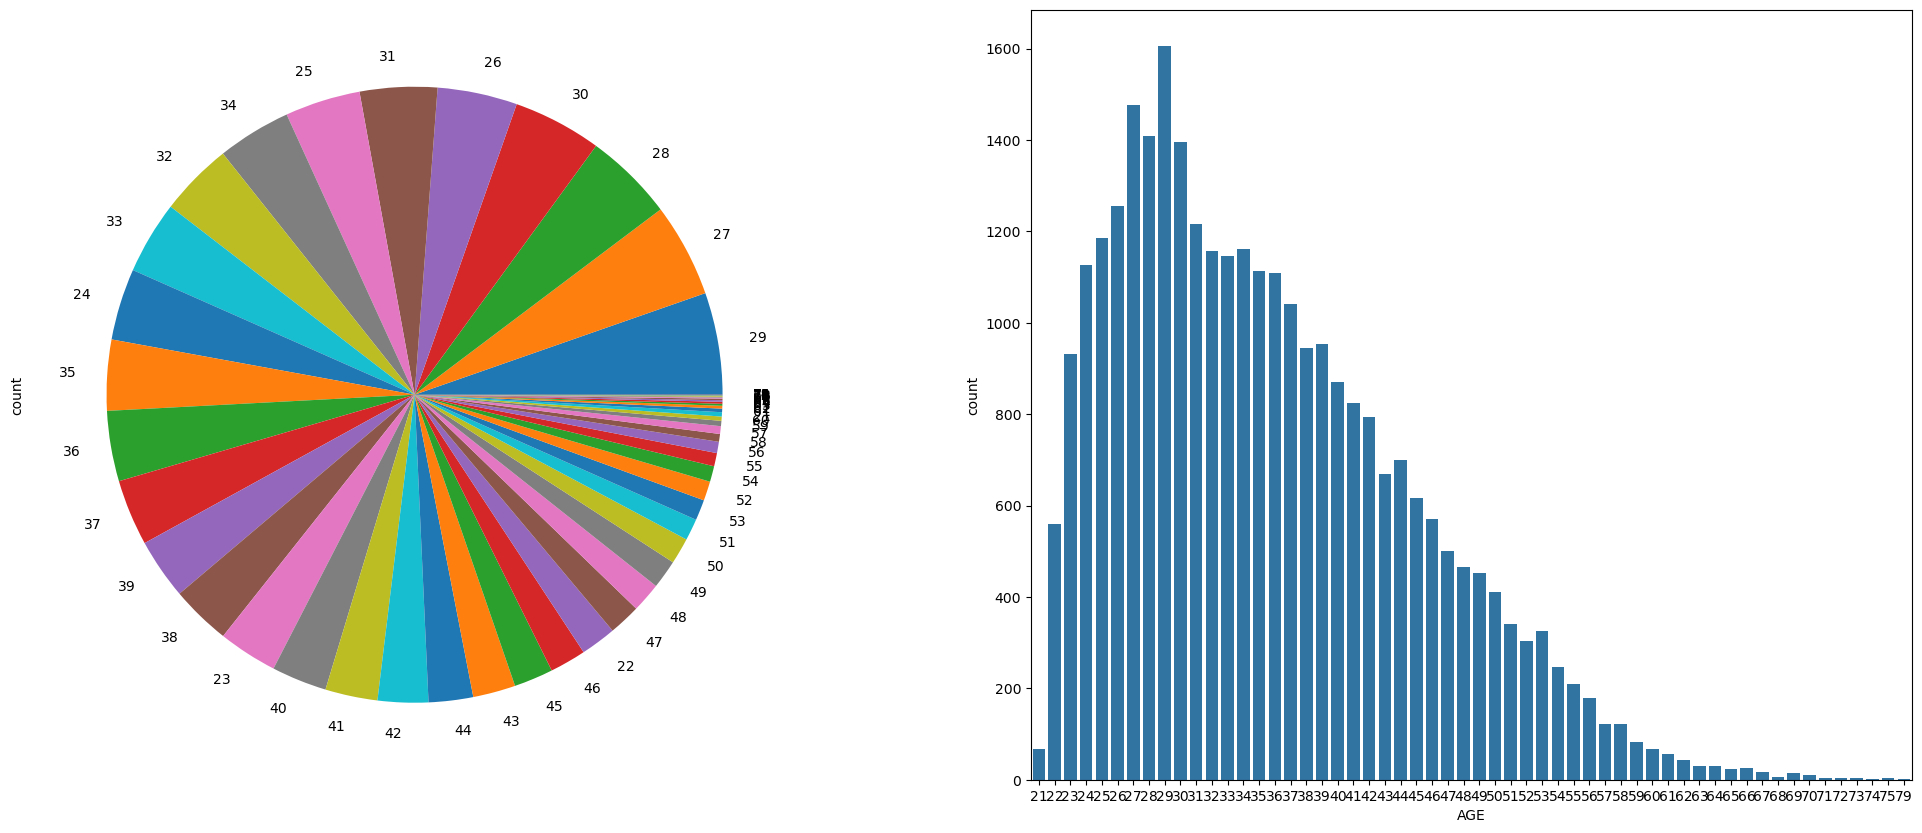

In [21]:
df['AGE'] = df['AGE'].astype(int)
df_age = df['AGE'].value_counts().reset_index()
df_age.head()

fig, axes = plt.subplots(ncols=2,figsize=(25,10))

df['AGE'].value_counts().plot(kind='pie', ax=axes[0], subplots=True)
sns.barplot(x='AGE', y='count', data=df_age,  ax = axes[1], orient='v')
plt.show()

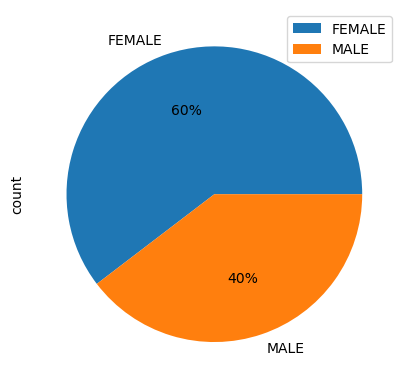

In [22]:
df_cat['SEX'].value_counts().plot(kind='pie', legend=True, autopct='%1.0f%%')
plt.show()

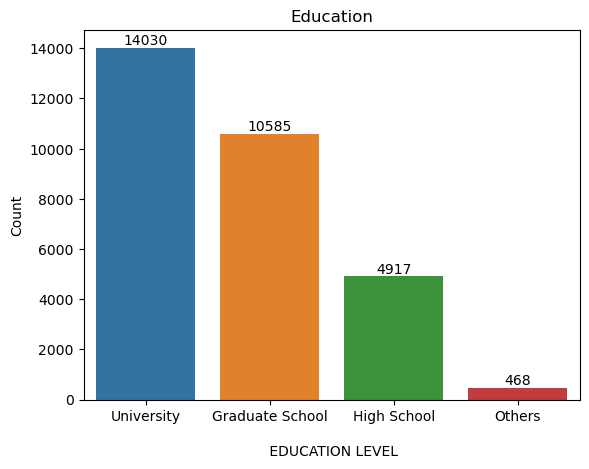

In [23]:
plot=sns.countplot(x='EDUCATION', hue='EDUCATION', data=df_cat)
plt.ylabel('Count')
plt.xlabel('\n EDUCATION LEVEL')
plt.title('Education')

total = len(df_cat['EDUCATION'])

for container in plot.containers:
    plot.bar_label(container)

#for p in plot.patches:
    #percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    #x = p.get_x() + p.get_width() / 2
    #y = p.get_y() + p.get_height() / 2
    #print(x)
    #plot.annotate(str(p.get_height()), (x, y))

plt.show()

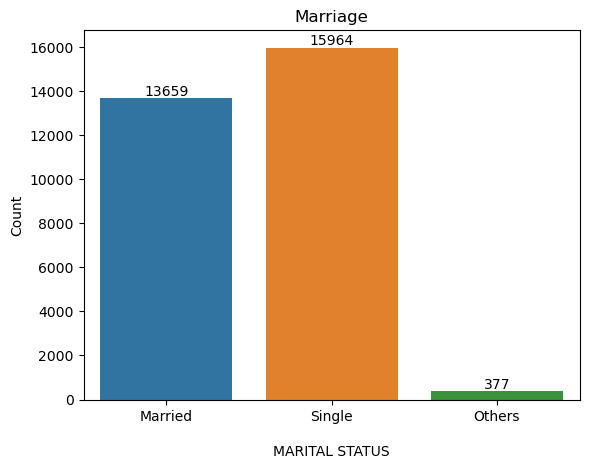

In [24]:
#Marital status

plot=sns.countplot(x='MARRIAGE', hue='MARRIAGE', data=df_cat)
plt.xlabel('\nMARITAL STATUS')
plt.ylabel('Count')
plt.title('Marriage')

total = len(df_cat['MARRIAGE'])

for container in plot.containers:
    plot.bar_label(container)

#for p in plot.patches:
#    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
#    x = p.get_x() + p.get_width() / 2
#    y = p.get_y() + p.get_height() / 2
    #print(x)
#    plot.annotate(str(p.get_height()), (x, y))

plt.show()

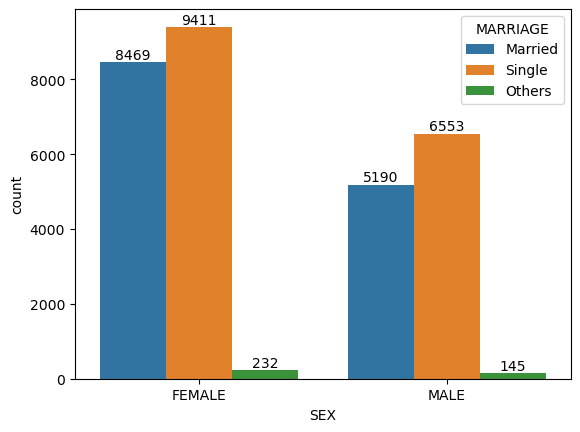

In [25]:
plot = sns.countplot(x='SEX',hue='MARRIAGE',  data=df_cat)
for container in plot.containers:
    plot.bar_label(container)
plt.show()

In [26]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

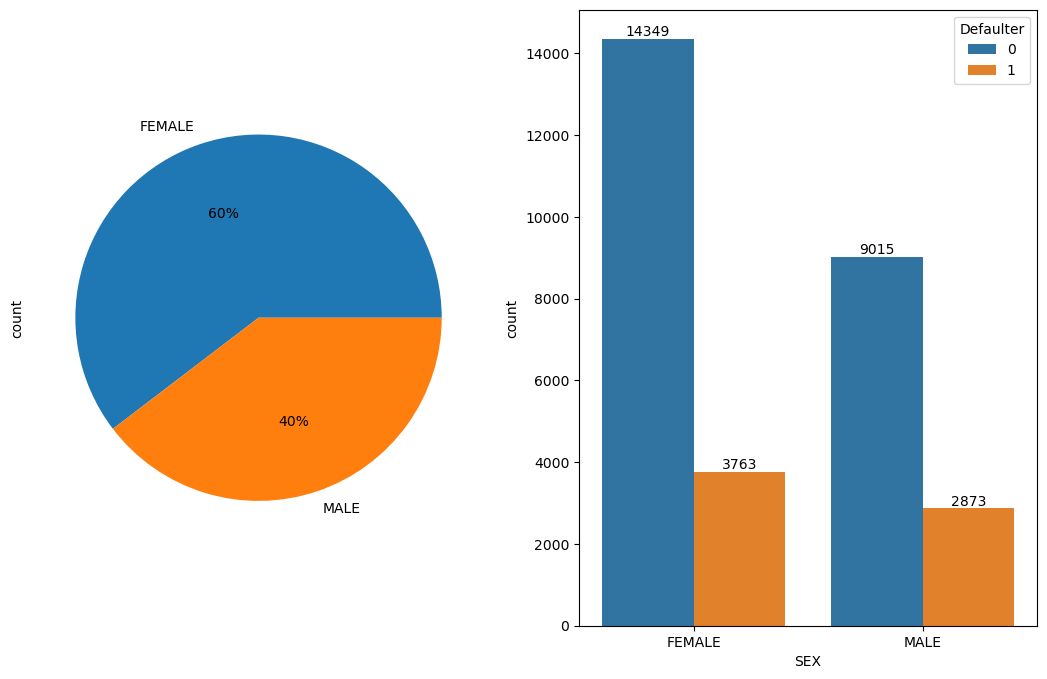

<Figure size 1000x500 with 0 Axes>

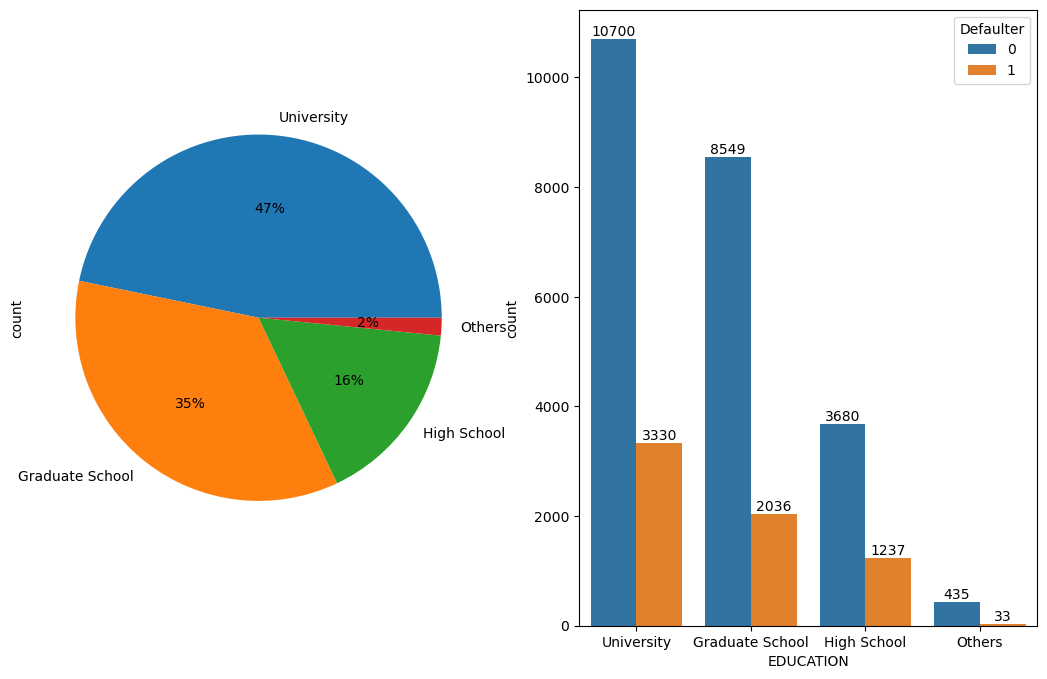

<Figure size 1000x500 with 0 Axes>

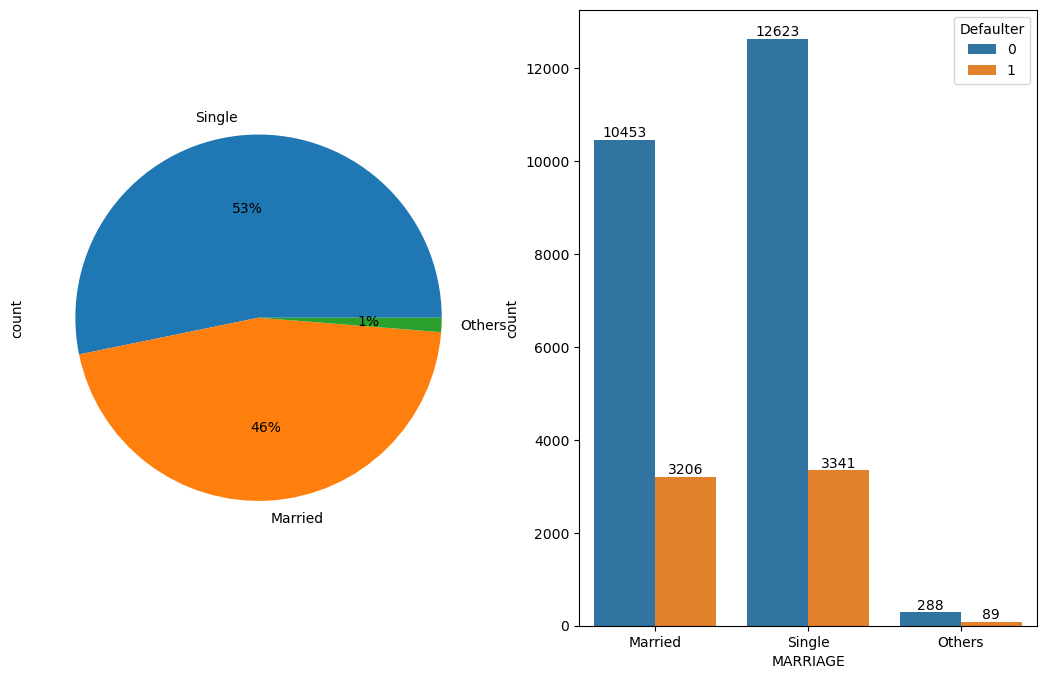

In [27]:
for col in categorical_features:
    plt.figure(figsize=(10,5))
    fig, axes = plt.subplots(ncols=2, figsize=(13,8))
    plot = df_cat[col].value_counts().plot(kind='pie', ax=axes[0], subplots=True, autopct='%1.0f%%')
    plot2 = sns.countplot(x=col, hue='Defaulter', data=df_cat)

    for container in plot2.containers:
        plot2.bar_label(container)

#    for p in plot2.patches:
#        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
#        x = p.get_x() + p.get_width() / 2
#        y = p.get_y() + p.get_height() / 2
        #print(x)
#        if p.get_height()>0:
#            plot2.annotate(str(p.get_height()), (x, y))

    plt.show()


In [28]:
"""
Below are few observations for categorical features:

1. There are more females credit card holder,so no. of defaulter have high proportion of females.
2. Number of defaulters have a higher proportion of educated people (graduate school and university)
3. Number of defaulters have a higher proportion of Singles.

In short : Single Educated Female
"""

'\nBelow are few observations for categorical features:\n\n1. There are more females credit card holder,so no. of defaulter have high proportion of females.\n2. Number of defaulters have a higher proportion of educated people (graduate school and university)\n3. Number of defaulters have a higher proportion of Singles.\n\nIn short : Single Educated Female\n'

In [29]:
# Limit Balance
df['LIMIT_BAL'].max()

1000000

In [30]:
df['LIMIT_BAL'].min()

10000

In [31]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

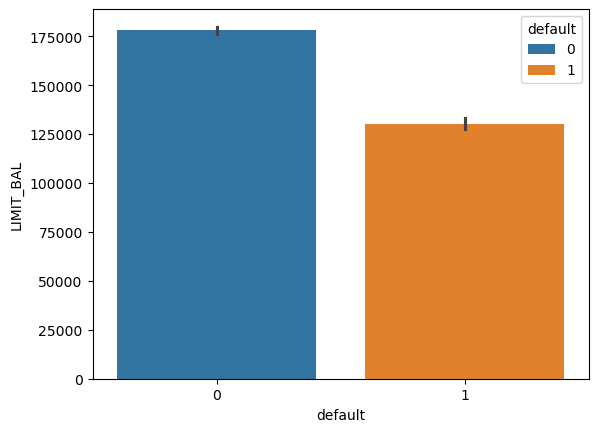

In [32]:
sns.barplot(x='default', y='LIMIT_BAL', data=df, hue='default')
plt.show()

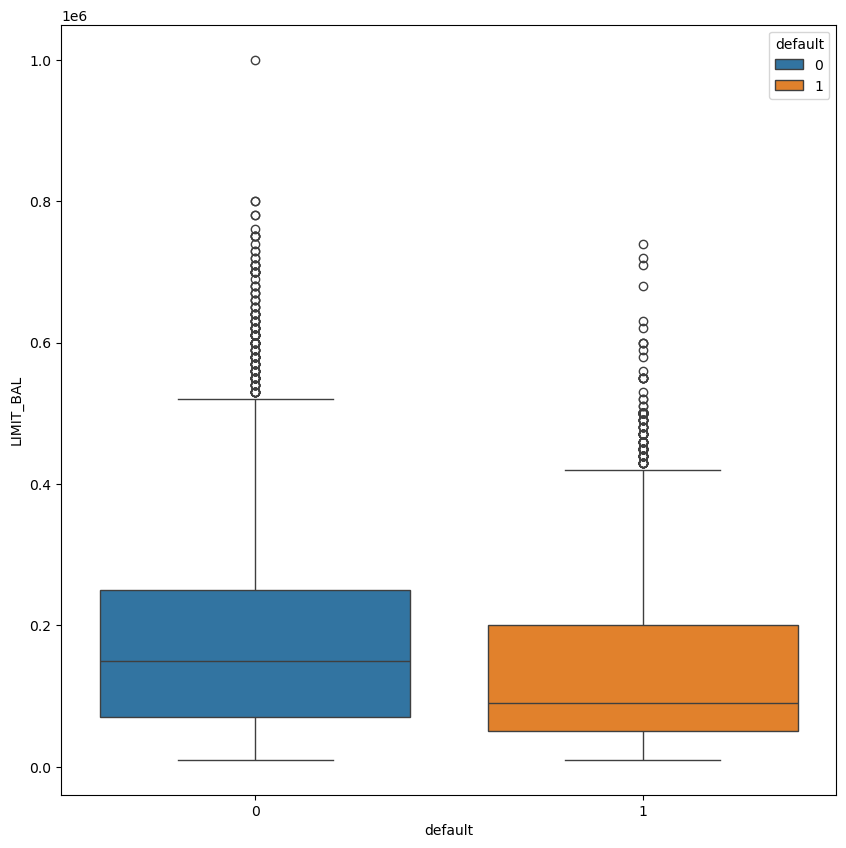

In [33]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='default', y='LIMIT_BAL', data=df, hue='default')
plt.show()

In [34]:
# renaming columns

df.rename(columns={'PAY_0':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JUL', 'PAY_4':'PAY_JUN', 'PAY_5':'PAY_MAY', 'PAY_6':'PAY_APR'}, inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JUL', 'BILL_AMT4':'BILL_AMT_JUN', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APR'}, inplace=True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JUL', 'PAY_AMT4':'PAY_AMT_JUN', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APR'}, inplace=True)

In [35]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [36]:
# AGE

df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

In [37]:
df['AGE'] = df['AGE'].astype(int)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [38]:
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
Day_df = df['AGE'].value_counts().reset_index()

Day_df.head()

,AGE,count
0,29,1605
1,27,1477
2,28,1409
3,30,1395
4,26,1256


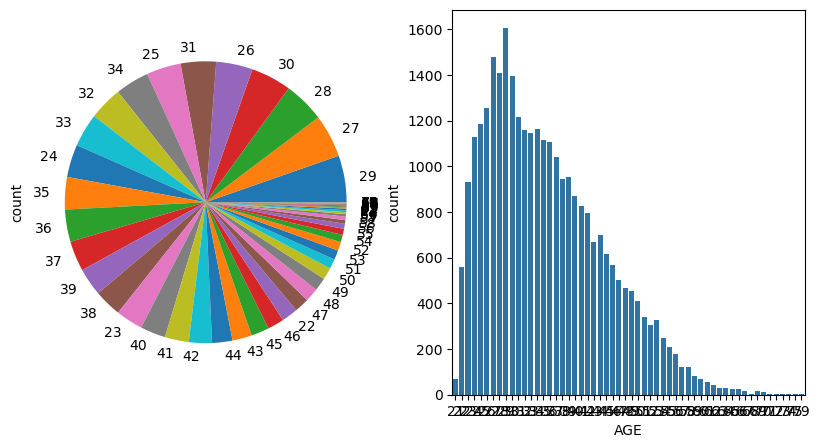

<Figure size 1500x1000 with 0 Axes>

In [39]:
plt.figure(figsize=(15,10))
df['AGE'].value_counts().plot(kind="pie", ax=axes[0], subplots=True)
sns.barplot(x='AGE', y='count', data=Day_df, ax=axes[1], orient='v')
plt.show()

In [40]:
df.groupby('default')['AGE'].mean()

default
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [41]:
df = df.astype('int')

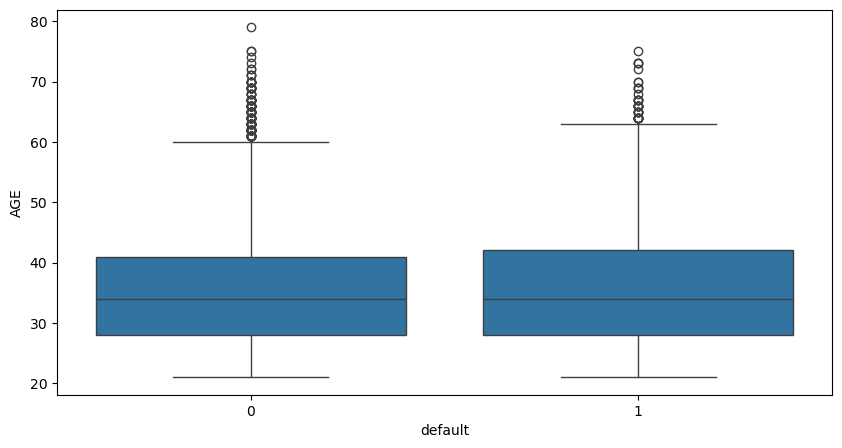

In [42]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x='default', y='AGE', data=df)
plt.show()

In [43]:
#Bill amount

bill_amnt_df = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]

In [44]:
#sns.pairplot(data=bill_amnt_df)
#plt.show()

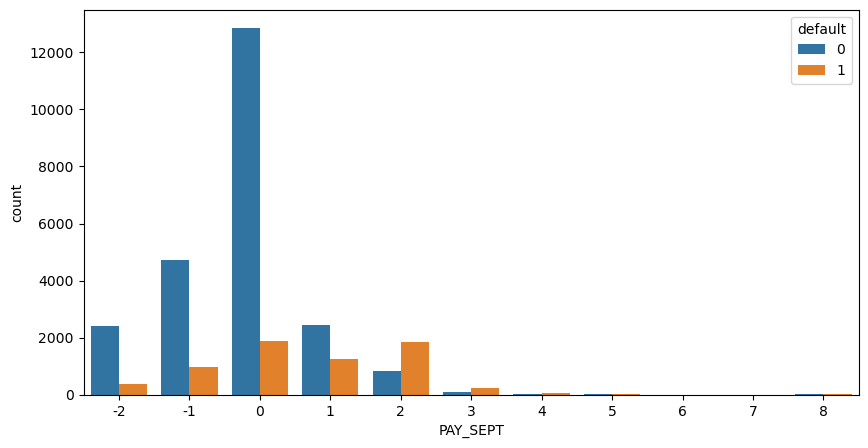

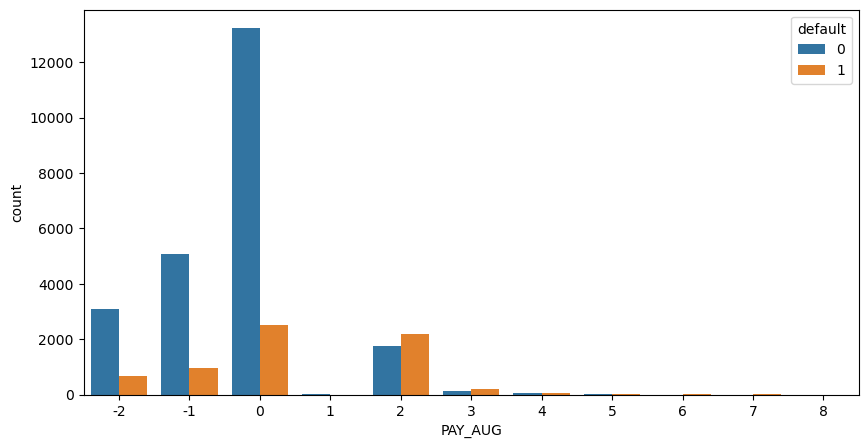

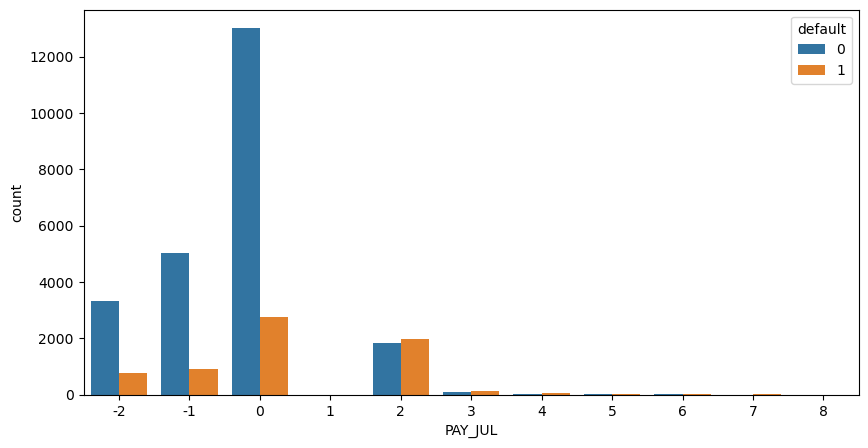

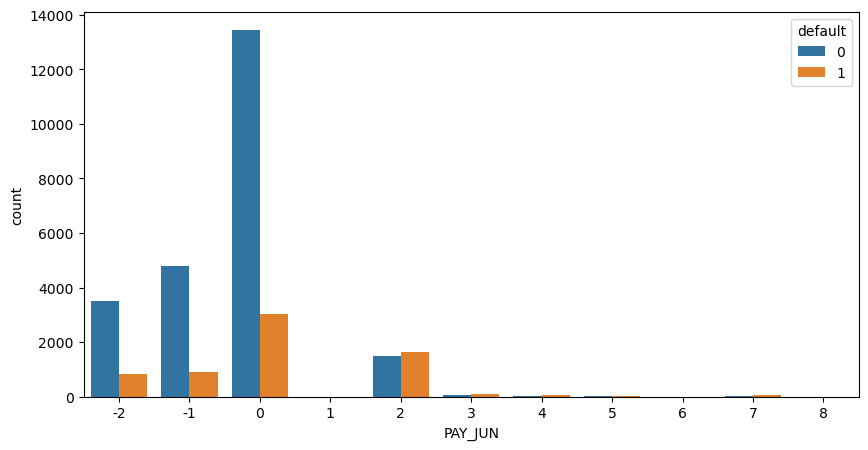

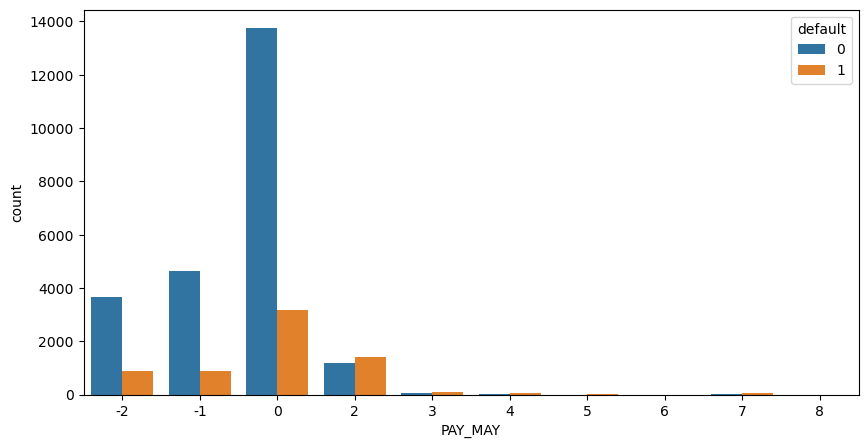

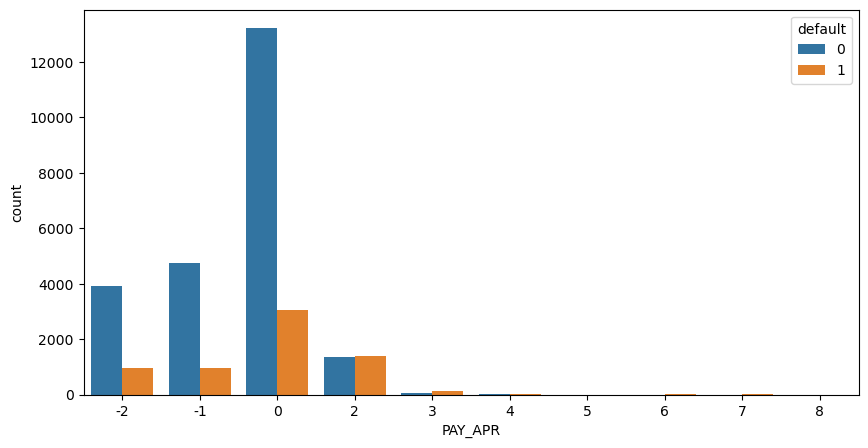

In [45]:
#History payment status

pay_col = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

for col in pay_col:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='default', data=df)
    plt.show()

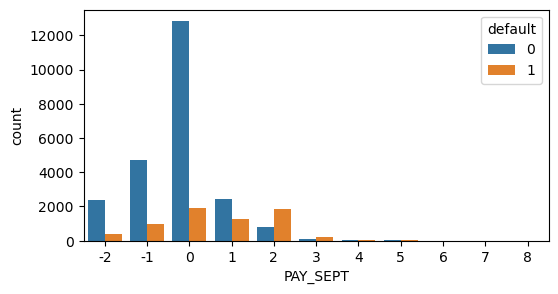

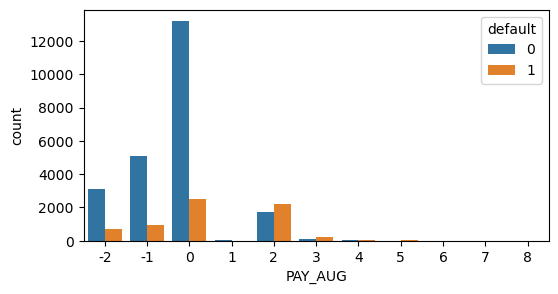

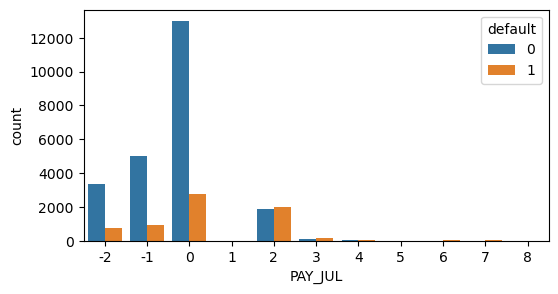

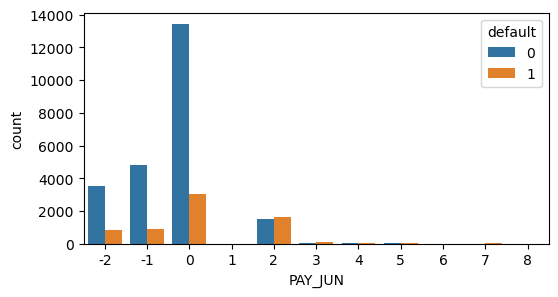

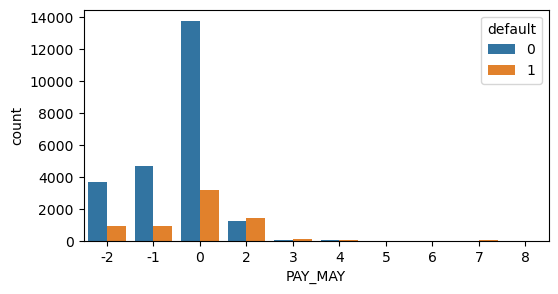

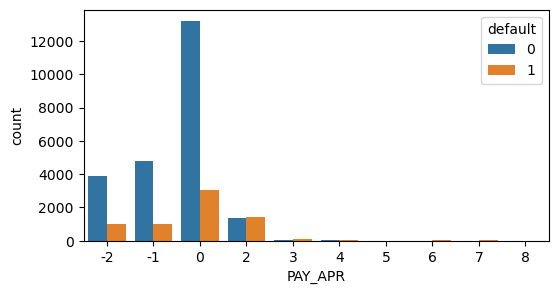

In [46]:
#History Payment

pay_col = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for col in pay_col:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, data=df, hue='default')
    plt.show()

<Figure size 600x300 with 0 Axes>

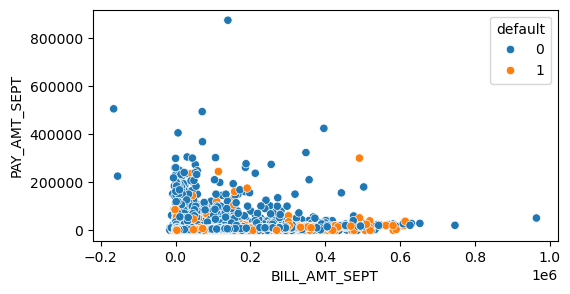

<Figure size 600x300 with 0 Axes>

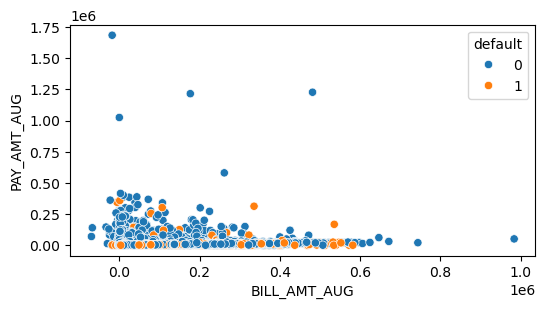

<Figure size 600x300 with 0 Axes>

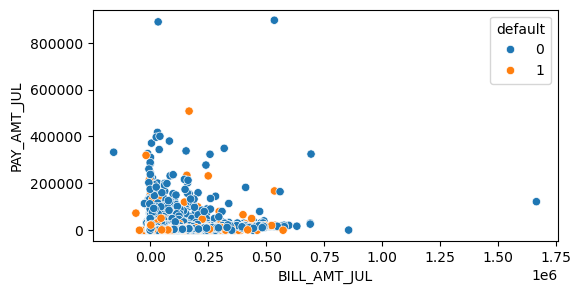

<Figure size 600x300 with 0 Axes>

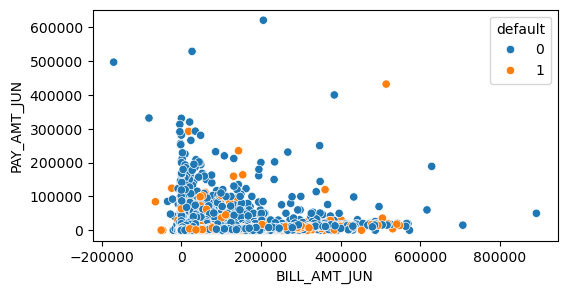

<Figure size 600x300 with 0 Axes>

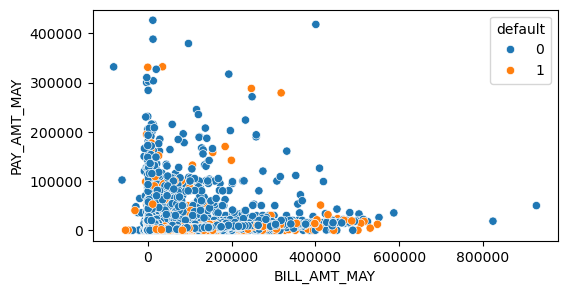

<Figure size 600x300 with 0 Axes>

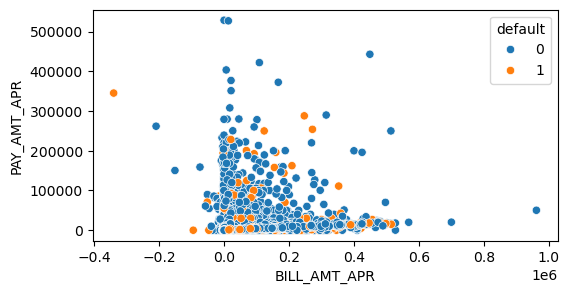

In [47]:
col_bills = ['BILL_AMT_SEPT','BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY','BILL_AMT_APR']
col_pays  = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']


for i in range (0,len(col_bills)):
    plt.figure(figsize=(6,3))
    fig, axes = plt.subplots(ncols=1, figsize=(6,3))
    sns.scatterplot(data=df, x=col_bills[i], y=col_pays[i], hue='default', ax=axes)
    plt.show()

In [48]:
#pay_amnt_df = df[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'default']]
#sns.pairplot(data=pay_amnt_df, hue='default')
#plt.show()

In [49]:
#SMOTE ( Synthetic Minority Oversampling Technique )

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [52]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,22510,90000,2,2,1,36,0,0,2,0,...,90389,81435,51841,49961,8592,1,4312,3506,2540,1380
46724,27273,60000,1,2,1,24,0,0,0,0,...,61920,59765,35257,34843,2403,3025,2076,1048,1145,770
46725,9096,200000,1,2,1,36,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
46726,27085,199453,1,2,1,35,0,0,2,0,...,196443,187692,102010,99935,15808,180,6465,8754,122,4011


In [53]:
columns = list(df.columns)

In [54]:
columns.pop()

'default'

In [55]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [56]:
balance_df['default']=y_smote
balance_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


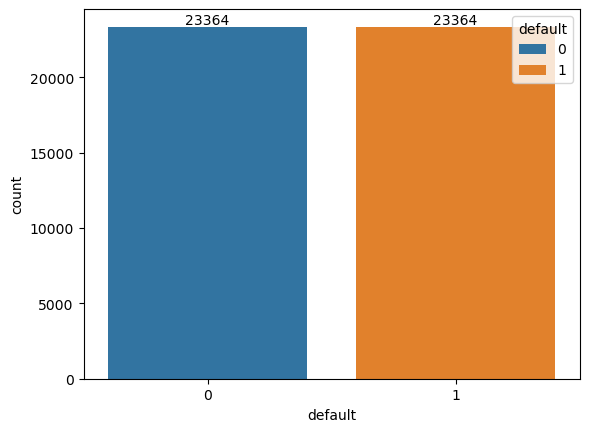

In [57]:
plot = sns.countplot(x='default', data=balance_df, hue='default')
for container in plot.containers:
    plot.bar_label(container)
plt.show()

In [58]:
balance_df[balance_df['default']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,22510,90000,2,2,1,36,0,0,2,0,...,81435,51841,49961,8592,1,4312,3506,2540,1380,1
46724,27273,60000,1,2,1,24,0,0,0,0,...,59765,35257,34843,2403,3025,2076,1048,1145,770,1
46725,9096,200000,1,2,1,36,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1
46726,27085,199453,1,2,1,35,0,0,2,0,...,187692,102010,99935,15808,180,6465,8754,122,4011,1


In [59]:
## Feature Engineering

In [60]:
df_FE = balance_df.copy()

In [61]:
df_FE['PAYMENT_VALUE'] = df_FE['PAY_SEPT']+df_FE['PAY_AUG']+df_FE['PAY_JUL']+df_FE['PAY_JUN']+df_FE['PAY_MAY']+df_FE['PAY_APR']

In [62]:
df_FE.groupby('default')['PAYMENT_VALUE'].mean()

default
0   -1.980140
1    1.700009
Name: PAYMENT_VALUE, dtype: float64

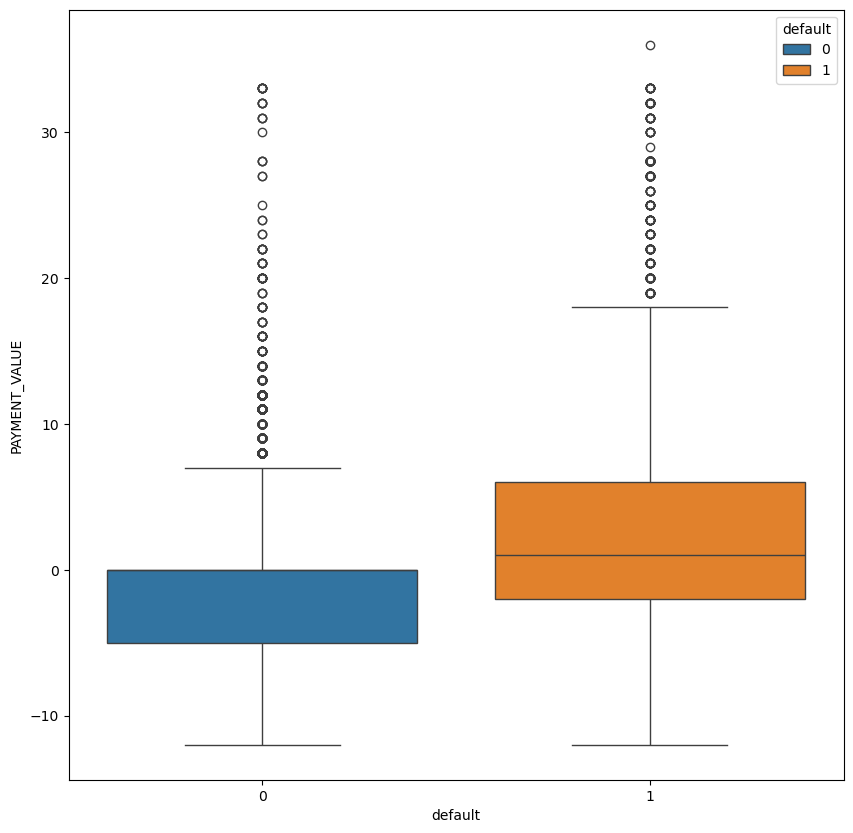

In [63]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_FE, x='default', y='PAYMENT_VALUE', hue='default')
plt.show()

In [64]:
df_FE['BILL_AMOUNT_TOTAL'] = (df_FE['BILL_AMT_APR']+df_FE['BILL_AMT_MAY']+df_FE['BILL_AMT_JUN']+df_FE['BILL_AMT_JUL']+df_FE['BILL_AMT_AUG']+df_FE['BILL_AMT_SEPT'])
df_FE['PAY_AMOUNT_TOTAL'] = (df_FE['PAY_AMT_APR']+df_FE['PAY_AMT_MAY']+df_FE['PAY_AMT_JUN']+df_FE['PAY_AMT_JUL']+df_FE['PAY_AMT_AUG']+df_FE['PAY_AMT_SEPT'])

df_FE['DUE'] = df_FE['BILL_AMOUNT_TOTAL'] - df_FE['PAY_AMOUNT_TOTAL']

In [65]:
df_FE.groupby('default')['DUE'].mean()

default
0    237459.487203
1    240109.361839
Name: DUE, dtype: float64

In [66]:
#EDUCATION

In [67]:
df_FE['EDUCATION'].unique()

array([2, 1, 3, 4])

In [68]:
df_FE['EDUCATION']=np.where(df_FE['EDUCATION'] == 6,4,df_FE['EDUCATION'])
df_FE['EDUCATION']=np.where(df_FE['EDUCATION'] == 0,4,df_FE['EDUCATION'])

In [69]:
# MARRIAGE

In [70]:
df_FE['MARRIAGE'].unique()

array([1, 2, 3])

In [71]:
df_FE['MARRIAGE'] == np.where(df_FE['MARRIAGE']==0,3,df_FE['MARRIAGE'])

0        True
1        True
2        True
3        True
4        True
         ... 
46723    True
46724    True
46725    True
46726    True
46727    True
Name: MARRIAGE, Length: 46728, dtype: bool

In [72]:
df_FE['SEX'].unique()

array([2, 1])

In [73]:
df_FE.replace({'SEX':{1:'MALE',2:'FEMALE'}, 
               'EDUCATION':{1:'GRADUATE SCHOOL', 2:'UNIVERSITY', 3:'HIGH SCHOOL', 4:'OTHERS'},
               'MARRIAGE':{1:'MARRIED', 2:'SINGLE', 3:'OTHERS'}},inplace=True)

In [74]:
df_FE.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default,PAYMENT_VALUE,BILL_AMOUNT_TOTAL,PAY_AMOUNT_TOTAL,DUE
0,1,20000,FEMALE,UNIVERSITY,MARRIED,24,2,2,-1,-1,...,689,0,0,0,0,1,-2,7704,689,7015
1,2,120000,FEMALE,UNIVERSITY,SINGLE,26,-1,2,0,0,...,1000,1000,1000,0,2000,1,3,17077,5000,12077
2,3,90000,FEMALE,UNIVERSITY,SINGLE,34,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,101653,11018,90635
3,4,50000,FEMALE,UNIVERSITY,MARRIED,37,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,231334,8388,222946
4,5,50000,MALE,UNIVERSITY,MARRIED,57,-1,0,-1,0,...,36681,10000,9000,689,679,0,-2,109339,59049,50290


In [75]:
#One Hot Encoding

In [76]:
df_FE = pd.get_dummies(df_FE, columns=['EDUCATION', 'MARRIAGE'])

In [77]:
df_FE.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMOUNT_TOTAL,PAY_AMOUNT_TOTAL,DUE,EDUCATION_GRADUATE SCHOOL,EDUCATION_HIGH SCHOOL,EDUCATION_OTHERS,EDUCATION_UNIVERSITY,MARRIAGE_MARRIED,MARRIAGE_OTHERS,MARRIAGE_SINGLE
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,7704,689,7015,False,False,False,True,True,False,False
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,17077,5000,12077,False,False,False,True,False,False,True
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,101653,11018,90635,False,False,False,True,False,False,True
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,231334,8388,222946,False,False,False,True,True,False,False
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,109339,59049,50290,False,False,False,True,True,False,False


In [78]:
df_FE.drop(['EDUCATION_OTHERS', 'MARRIAGE_OTHERS'], axis=1, inplace=True)

In [79]:
df_FE.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,default,PAYMENT_VALUE,BILL_AMOUNT_TOTAL,PAY_AMOUNT_TOTAL,DUE,EDUCATION_GRADUATE SCHOOL,EDUCATION_HIGH SCHOOL,EDUCATION_UNIVERSITY,MARRIAGE_MARRIED,MARRIAGE_SINGLE
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,1,-2,7704,689,7015,False,False,True,True,False
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1,3,17077,5000,12077,False,False,True,False,True
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,0,101653,11018,90635,False,False,True,False,True
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,0,231334,8388,222946,False,False,True,True,False
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,0,-2,109339,59049,50290,False,False,True,True,False


In [80]:
df_FE = pd.get_dummies(df_FE, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first=True)

In [81]:
df_FE.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [82]:
#Label encoding for SEX

In [83]:
encoders_nums = {"SEX": {"FEMALE":0, "MALE":1}}
df_FE = df_FE.replace(encoders_nums)
df_FE.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_18932\3585508278.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_FE = df_FE.replace(encoders_nums)


,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [84]:
df_FE.drop('ID', axis=1, inplace=True)
df_FE.to_csv('FINAL_CREDIT_CARD_DF_26NOV24.csv')

In [85]:
df_FE.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,False,False,False,True,False,False,False,False,False,False
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,False,True,False,False,False,False,False,False,False,False
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,False,True,False,False,False,False,False,False,False,False
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,False,True,False,False,False,False,False,False,False,False


In [86]:
# Logistic Regression

In [87]:
df_log_reg = df_FE.copy()
df_log_reg.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,False,False,False,True,False,False,False,False,False,False
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,False,True,False,False,False,False,False,False,False,False
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,False,True,False,False,False,False,False,False,False,False
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,False,True,False,False,False,False,False,False,False,False


In [88]:
X = df_log_reg.drop(['default', 'PAYMENT_VALUE', 'DUE'], axis=1)
y = df_log_reg['default']

In [89]:
columns = X.columns

In [90]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42, stratify=y)

In [92]:
len(X_test)

15421

In [93]:
param_grid = {'penalty':['l1','l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [94]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', n_jobs=-1, verbose=3, cv=3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [95]:
optimized_clf = grid_lr_clf.best_estimator_

In [96]:
grid_lr_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [97]:
grid_lr_clf.best_score_

0.7501518339604244

In [98]:
#PRedicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [99]:
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [100]:
train_accuracy_lr = accuracy_score(train_class_preds, y_train)
test_accuracy_lr = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7504711406394736
The accuracy on test data is  0.7535827767330264


In [101]:
test_accuracy_lr = accuracy_score(test_class_preds, y_test)
test_precision_score_lr = precision_score(test_class_preds, y_test)
test_recall_score_lr = recall_score(test_class_preds, y_test)
test_f1_score_lr = recall_score(test_class_preds, y_test)
test_roc_score_lr = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The F1 Score on test data is ", test_f1_score_lr)
print("The ROC score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7535827767330264
The precision on test data is  0.6913099870298314
The recall on test data is  0.7896296296296297
The F1 Score on test data is  0.7896296296296297
The ROC score on test data is  0.7575757420435082


[[12771  2882]
 [ 4930 10724]]


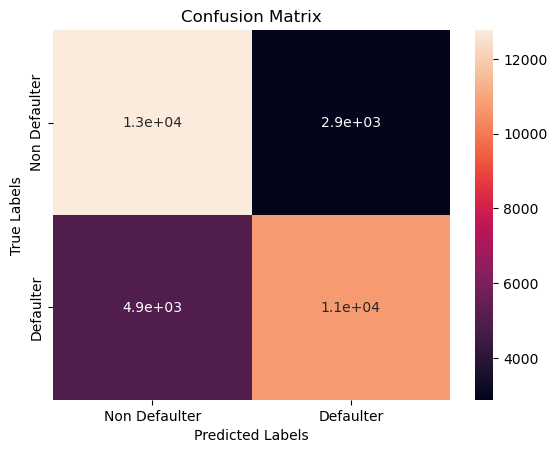

In [102]:
#Get the confusion matrix for both train and test

labels = ['Non Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

#labels, title and ticks
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.show()

In [103]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel()})

In [104]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)[:10]

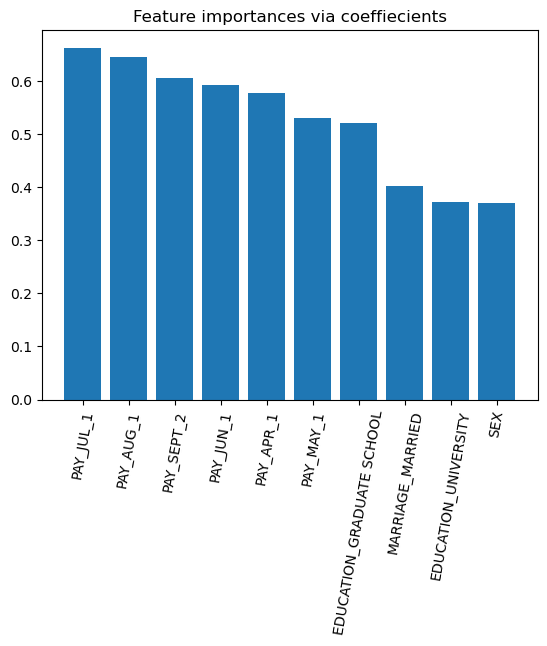

In [105]:
plt.bar(height=feature_importance['Importance'], x=feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coeffiecients")
plt.show()

In [106]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

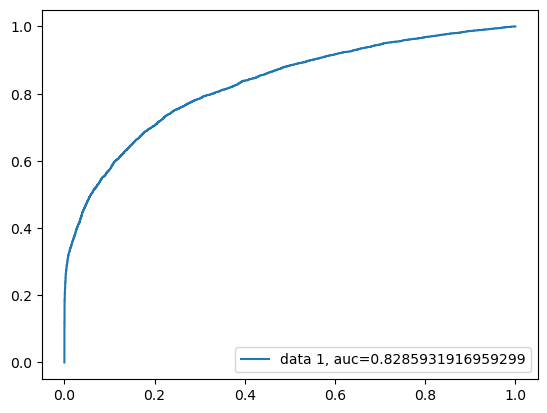

In [107]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [108]:
# Implementing SVC

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [110]:
#param_grid = {
#                'C': [0.1, 1, 10, 100],
#                'kernel': ['rbf']
#             }

In [111]:
#X = df_FE.drop(['default','PAYMENT_VALUE','DUE'], axis=1)
#y = df_FE['default']

In [112]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [113]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42, stratify=y)

In [114]:
#grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring='accuracy', n_jobs=-1, verbose=3, cv=3)
#grid_clf.fit(X_train, y_train)

In [115]:
#optimal_SVC_clf = grid_clf.best_estimator_

In [116]:
#grid_clf.best_params_

In [117]:
#Decision Tree

param_grid = {'max_depth' : [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [118]:
from sklearn.tree import DecisionTreeClassifier

X = df_FE.drop(['default', 'PAYMENT_VALUE', 'DUE'], axis=1)
y = df_FE['default']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42, stratify=y)

In [120]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [121]:
grid_DTC_clf.best_score_

0.7041555256768784

In [122]:
optimized_DTC_clf = grid_DTC_clf.best_estimator_

In [123]:
train_class_preds = optimized_DTC_clf.predict(X_train)
test_class_preds = optimized_DTC_clf.predict(X_test)

In [124]:
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.1}

In [125]:
#Accuracy

train_accuracy_DTC = accuracy_score(train_class_preds, y_train)
test_accuracy_DTC = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7083080461238701
The accuracy on test data is  0.7129239348939758


In [126]:
## Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
X = df_FE.drop(['default','PAYMENT_VALUE','DUE'],axis=1)
y = df_FE['default']

In [129]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [130]:
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [131]:
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9992972817580733
The accuracy on test data is  0.8389209519486415


In [132]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8389209519486415
The precision on test data is  0.8107652399481193
The recall on test data is  0.8591258933479934
The f1 on test data is  0.8342452956092353
The roc_score on test data is  0.8399987968888524


In [133]:
##XG Boost

In [134]:
import lightgbm as lgb
import xgboost as xgb

In [135]:
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [136]:
num_round=50
from datetime import datetime
start = datetime.now()
xg=xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

C:\Users\admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:47:21] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [137]:
execution_time_xgb = stop-start
execution_time_xgb

datetime.timedelta(microseconds=243084)

In [138]:
train_class_preds_probs_xg=xg.predict(dtrain)

In [139]:
test_class_preds_probs_xg =xg.predict(dtest)

In [140]:
len(train_class_preds_probs_xg)

31307

In [141]:
train_class_preds_xg = []
test_class_preds_xg = []
for i in range(0,len(train_class_preds_probs_xg)):
  if train_class_preds_probs_xg[i] >= 0.5:
    train_class_preds_xg.append(1)
  else:
    train_class_preds_xg.append(0)

for i in range(0,len(test_class_preds_probs_xg)):
  if test_class_preds_probs_xg[i] >= 0.5:
    test_class_preds_xg.append(1)
  else:
    test_class_preds_xg.append(0)

In [142]:
test_class_preds_probs_xg[:20]

array([0.2597893 , 0.2295379 , 0.346165  , 0.23354663, 0.21058409,
       0.3410692 , 0.20613205, 0.3586405 , 0.5961361 , 0.33662498,
       0.6349851 , 0.32302463, 0.9045284 , 0.526497  , 0.75447065,
       0.2840475 , 0.93016684, 0.4616145 , 0.78367937, 0.25510642],
      dtype=float32)

In [143]:
len(test_class_preds_probs_xg)

15421

In [144]:
train_accuracy_xgb = accuracy_score(train_class_preds_xg,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds_xg,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7840419075606094
The accuracy on test data is  0.7771221062187925


In [145]:
test_accuracy_xgb = accuracy_score(test_class_preds_xg,y_test)
test_precision_xgb = precision_score(test_class_preds_xg,y_test)
test_recall_score_xgb = recall_score(test_class_preds_xg,y_test)
test_f1_score_xgb = f1_score(test_class_preds_xg,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds_xg,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.7771221062187925
The precision on test data is  0.7156939040207523
The recall on test data is  0.8159100990684608
The f1 on test data is  0.7625233192841844
The roc_score on train data is  0.7813669229461038


In [146]:
# Artificial Neural Network

In [147]:
from sklearn.neural_network import MLPClassifier

cc_mlp = MLPClassifier(hidden_layer_sizes=(25), learning_rate_init=0.029, momentum=0.05, max_iter=100)
cc_mlp_trained = cc_mlp.fit(X_train, y_train)


In [148]:
train_class_preds_mlp = cc_mlp.predict(X_train)
test_class_preds_mlp = cc_mlp.predict(X_test)

In [149]:
train_accuracy_mlp = accuracy_score(train_class_preds_mlp,y_train)
test_accuracy_mlp = accuracy_score(test_class_preds_mlp,y_test)

print("The accuracy on train data is ", train_accuracy_mlp)
print("The accuracy on test data is ", test_accuracy_mlp)

The accuracy on train data is  0.5004312134666369
The accuracy on test data is  0.5002918098696583


In [150]:
len(X_test)

15421

In [151]:
test_accuracy_mlp = accuracy_score(test_class_preds_mlp,y_test)
test_precision_mlp = precision_score(test_class_preds_mlp,y_test)
test_recall_score_mlp = recall_score(test_class_preds_mlp,y_test)
test_f1_score_mlp = f1_score(test_class_preds_mlp,y_test)
test_roc_score_mlp = roc_auc_score(test_class_preds_mlp,y_test)

print("The accuracy on test data is ", test_accuracy_mlp)
print("The precision on test data is ", test_precision_mlp)
print("The recall on test data is ", test_recall_score_mlp)
print("The f1 on test data is ", test_f1_score_mlp)
print("The roc_score on train data is ", test_roc_score_mlp)

The accuracy on test data is  0.5002918098696583
The precision on test data is  0.9989623865110246
The recall on test data is  0.5001298701298701
The f1 on test data is  0.6665512765036781
The roc_score on train data is  0.5595887445887446


In [152]:
# Model evaluation

recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [153]:
classifiers = ['Logistic Regression',  'Random Forest', 'Xgboost', 'MLP']
train_accuracy = [train_accuracy_lr, train_accuracy_rf, train_accuracy_xgb, train_accuracy_mlp]
test_accuracy = [test_accuracy_lr,  test_accuracy_rf, test_accuracy_xgb, test_accuracy_mlp]
precision_score = [test_precision_score_lr,  test_precision_score_rf, test_precision_xgb, test_precision_mlp]
recall_score = [test_recall_score_lr,  test_recall_score_rf, test_recall_score_xgb, test_recall_score_mlp]
f1_score = [test_f1_score_lr,  test_f1_score_rf, test_f1_score_xgb, test_f1_score_mlp]

In [154]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.750471,0.753583,0.691310,0.789630,0.789630
1,Random Forest,0.999297,0.838921,0.810765,0.859126,0.834245
2,Xgboost,0.784042,0.777122,0.715694,0.815910,0.762523
3,MLP,0.500431,0.500292,0.998962,0.500130,0.666551
